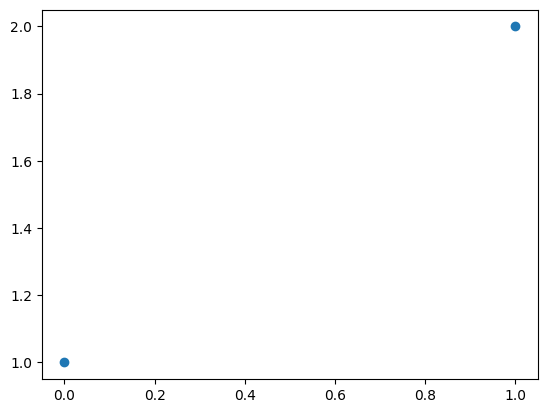

In [1]:
#!pip install --no-deps monai -q
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_nn
import seis_test
import seis_prior
import seis_invert
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

Mismatch to hosts: 3.544453883175856e-05
adjoint 5.346471963069144e-18 4.9042632427831433e-05
diff 1.574739655544795e-13 1.658886008067652e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 8.592302216947623e-18 0.0001352831488805387
diff 1.1770732250346666e-13 1.4481413612063529e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!


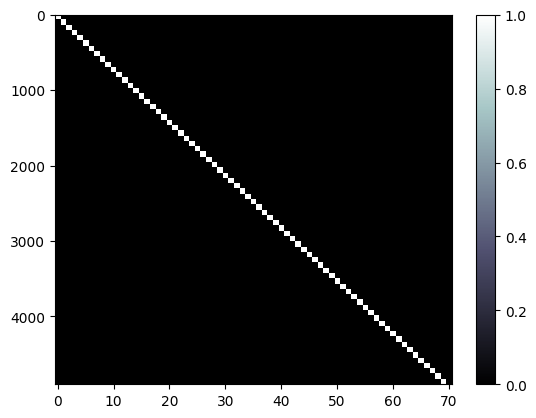

In [2]:
%%time
import seis_test
seis_test.run_all_tests()

In [3]:
data=kgs.load_all_train_data(validation_only=True)
data_flatvel = []
for d in data:
    if 'FlatVel' in d.family:
        data_flatvel.append(d)
len(data_flatvel)
data_flatvel = data_flatvel[::500]

In [4]:
model = kgs.ChainedModel()
model.models.append(seis_nn.make_default_pretrained())
model.models.append(seis_invert.InversionModel(prior=seis_prior.RowTotalVariation(λ=1e-8)))
#model.models[-1].method = 'L-BFGS-B'
model.models[-1].run_in_parallel = True
model.train([], []) # dummy

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed1_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed2_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
n_models: 2


In [5]:
data_out = model.models[0].infer(data_flatvel)
kgs.score_metric(data_out);

      family     score
0  FlatVel_A  1.857347
1  FlatVel_B  2.456327
Combined:  2.1568367346938775


In [6]:
%%time
data_out = model.infer(data_flatvel)
kgs.score_metric(data_out);

Processing: 100%|████████████████████████████████████████████████████████████████████████| 2/2 [02:58<00:00, 89.37s/it]

      family     score
0  FlatVel_A  0.082095
1  FlatVel_B  0.062431
Combined:  0.07226318793330264
CPU times: total: 703 ms
Wall time: 2min 59s


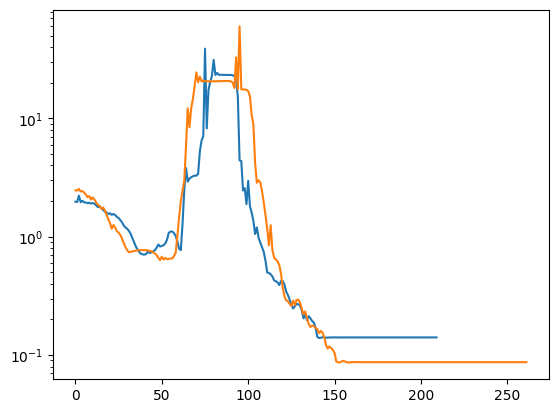

In [7]:
plt.figure()
for d in data_out:
    plt.semilogy([x for x in d.diagnostics['seis_to_vel']['vel_error_per_fev']])

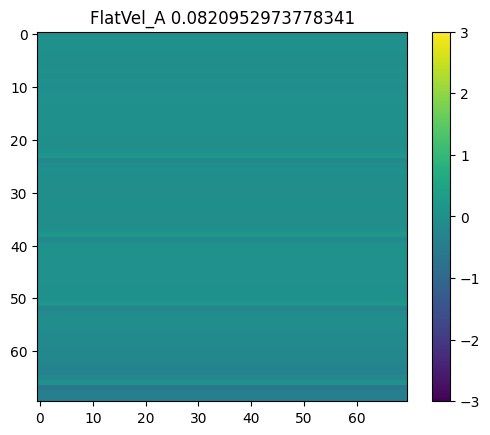

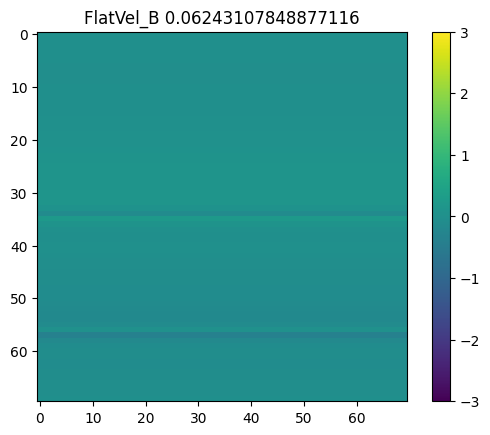

In [8]:
import cupy as cp
for d in data_out:
    d.load_to_memory()
    plt.figure()
    plt.imshow(d.velocity_guess.data - cp.asnumpy(d.velocity.data));plt.clim([-3,3]);plt.colorbar();
    plt.title(d.family+ ' ' +str(np.mean(np.abs(d.velocity_guess.data - cp.asnumpy(d.velocity.data)))))

In [9]:
data_out[0].velocity

Velocity(filename='f:/seismic/data//train_samples\\FlatVel_A/model/model1.npy', ind=0, data=array([[1524., 1524., 1524., ..., 1524., 1524., 1524.],
       [1524., 1524., 1524., ..., 1524., 1524., 1524.],
       [1524., 1524., 1524., ..., 1524., 1524., 1524.],
       ...,
       [4088., 4088., 4088., ..., 4088., 4088., 4088.],
       [4088., 4088., 4088., ..., 4088., 4088., 4088.],
       [4088., 4088., 4088., ..., 4088., 4088., 4088.]]), min_vel=array(1524.))

In [10]:
d.diagnostics['seis_to_vel']['vel_error_per_fev']

[array(2.46682716),
 array(2.45170862),
 array(2.5343927),
 array(2.41236679),
 array(2.43054477),
 array(2.36477497),
 array(2.27459714),
 array(2.1610392),
 array(2.20655182),
 array(2.06417087),
 array(2.14902926),
 array(2.06248047),
 array(1.94645881),
 array(1.85597991),
 array(1.82243541),
 array(1.71808581),
 array(1.76521876),
 array(1.6760311),
 array(1.53771338),
 array(1.40248623),
 array(1.30243886),
 array(1.16775755),
 array(1.25498565),
 array(1.19271735),
 array(1.11183356),
 array(1.08208057),
 array(1.03296724),
 array(0.96262886),
 array(0.87961646),
 array(0.8144997),
 array(0.76667862),
 array(0.73835616),
 array(0.74536996),
 array(0.75264155),
 array(0.75771367),
 array(0.76186794),
 array(0.76742368),
 array(0.7707282),
 array(0.77125745),
 array(0.77092668),
 array(0.77030246),
 array(0.76859782),
 array(0.76492624),
 array(0.75876945),
 array(0.74984296),
 array(0.7374568),
 array(0.72180227),
 array(0.6979851),
 array(0.66341148),
 array(0.63517726),
 array(